## 1 - Principais bibliotecas que utilizaremos

Nesta prática vamos utilizar as seguintes bibliotecas, que serão úteis durante o curso:

*   **Scikit-Image** ([`https://scikit-image.org/`](https://scikit-image.org/)): Processamento de imagens

*   **Scikit-Learn** ([`https://scikit-learn.org/`](https://scikit-learn.org/)): Machine Learning (possui algumas funções úteis para processamento de imagens)

*   **Matplotlib** ([`https://matplotlib.org/`](https://matplotlib.org/)): Gráficos

*   **Scipy** ([`https://www.scipy.org/`](https://www.scipy.org/)): É o pacote principal de rotinas científicas em Python

*   **Numpy** [`https://numpy.org/`](https://numpy.org/)): Análise numérica. É a principal biblioteca do Scipy

## 2 (Opcional) Preparando o Drive para Leitura e Escrita de Dados

Executar o código apenas se estiver usando o Google Colab.

In [39]:
# from google.colab import drive

# Montando o drive para leitura e escrita. Escolha a conta que você deseja utilizar
# drive.mount('/content/drive', force_remount=True)

## 3 - Importando e Visualizando uma Imagem

Antes de importar uma imagem própria, vamos visualizar uma imagem do banco de dados próprio do Scikit-Image, através do módulo `data`. 

**Exercício:** 

Importar a imagem rocket do banco do skimage.data e exibir 6 cópias dela num mosaico 2x3

In [40]:
from skimage import data

# Importar a imagem "rocket" do módulo data e salvar na variável rocket
rocket = data.rocket()

# Visuzalizar o número de pixels e canais da imagem
print(type(rocket))
print(rocket.shape)

<class 'numpy.ndarray'>
(427, 640, 3)


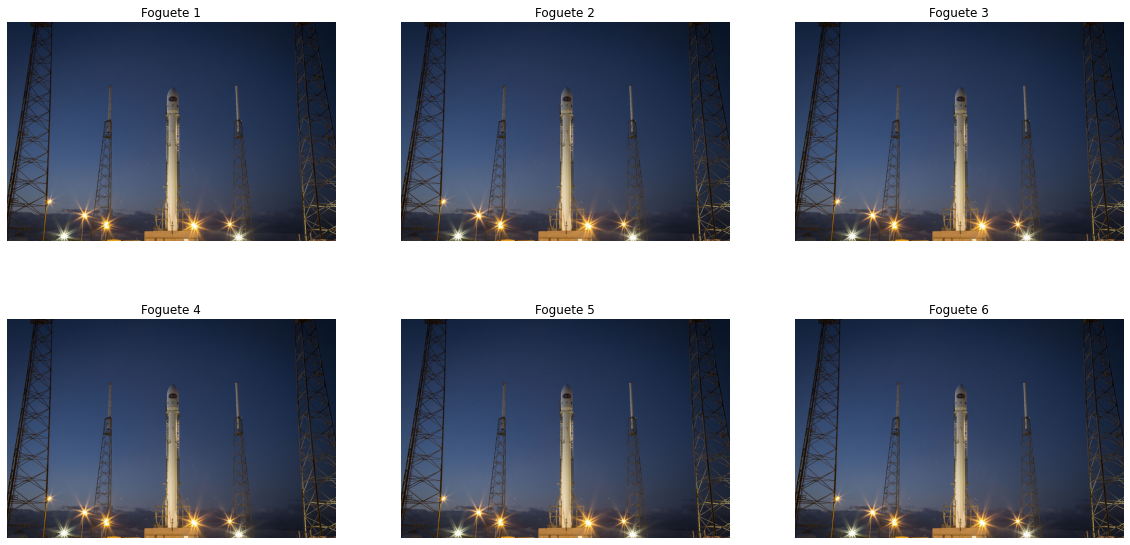

In [41]:
import matplotlib.pyplot as plt

# Visualizar a imagem importada usando o pyplot
plt.figure(figsize=(20,10))
for i in range(1,7):  
  plt.subplot(2,3,i)
  plt.imshow(rocket)
  plt.axis('off')
  plt.title(f'Foguete {i}')

plt.show()

**Exercício:**

**(a)** Importar a imagem `Rio.jpg` que está no repositório `https://github.com/m2m2020/cg_uerj.git` para o drive

In [42]:
from skimage import io

# Ler a imagem Images/Rio.jpg
rio = io.imread('data/images/rio.jpg')

**(b)** Visualizá-la usando o `pyplot`

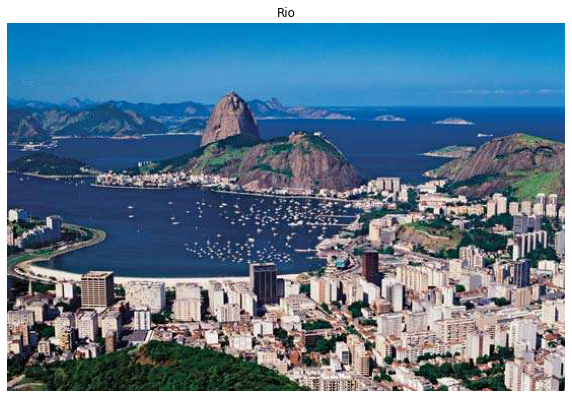

In [43]:
# Visualizar a imagem usando o pyplot
plt.figure(figsize=(10,10))
plt.imshow(rio)
plt.axis('off')
plt.title('Rio')
plt.show()

**(c)** Exibir o tipo da variável gerada após a importação da imagem

In [44]:
# Escreve o tipo da variável
print(type(rio))
print(type(rio[0][0][0]))
print(rio[0][0][0])
print(rio[0][0][1])
print(rio[0][0][2])

<class 'numpy.ndarray'>
<class 'numpy.uint8'>
5
118
188


**(d)** Exibir as dimensões da imagem

In [45]:
# Escreve as dimensões da variável
print(rio.shape)

(363, 550, 3)


**(e)** Gerar a imagem e escala de cinza

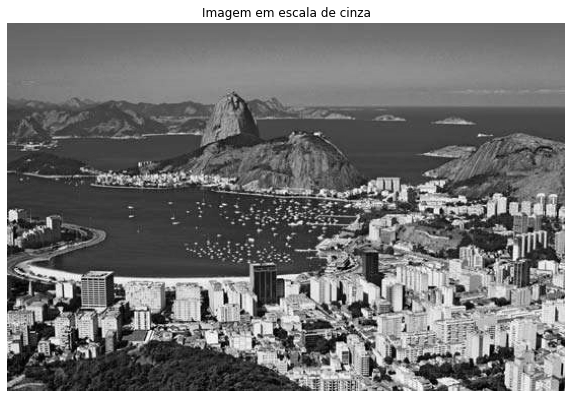

In [46]:
from skimage.color import rgb2gray

# Gerando a imagem em escala de cinza
rio_gray = rgb2gray(rio) # Cria imagem com apenas um canal, monocromática

# Exibindo a imagem
plt.figure(figsize = (10,10))
plt.title('Imagem em escala de cinza')

# Não imprime em cinza, pyplot define uma cor padrão baseada no seu mapa de cor
# plt.imshow(rio_gray) 

# Para imprimir em tons de cinze, defina o mapa de cor como "gray"
plt.imshow(rio_gray, cmap = 'gray')

plt.axis('off')
plt.show()

## 4 - Canais da Imagem

As imagens no sistema de cores RGB são formadas por 3 canais (R: Vermelho, G: Verde e B: Azul). Podemos estar interessados em conhecer as intensidades de cada canal em cada pixel da imagem. Nesta seção vamos analisar cada canal da imagem importada separadamente.

**Exercício:**

**(a)** Visualizar a imagem formada por cada canal separadamente em escala de cinza. Apresente as imagens usando 3 subplots em formato 1x3.

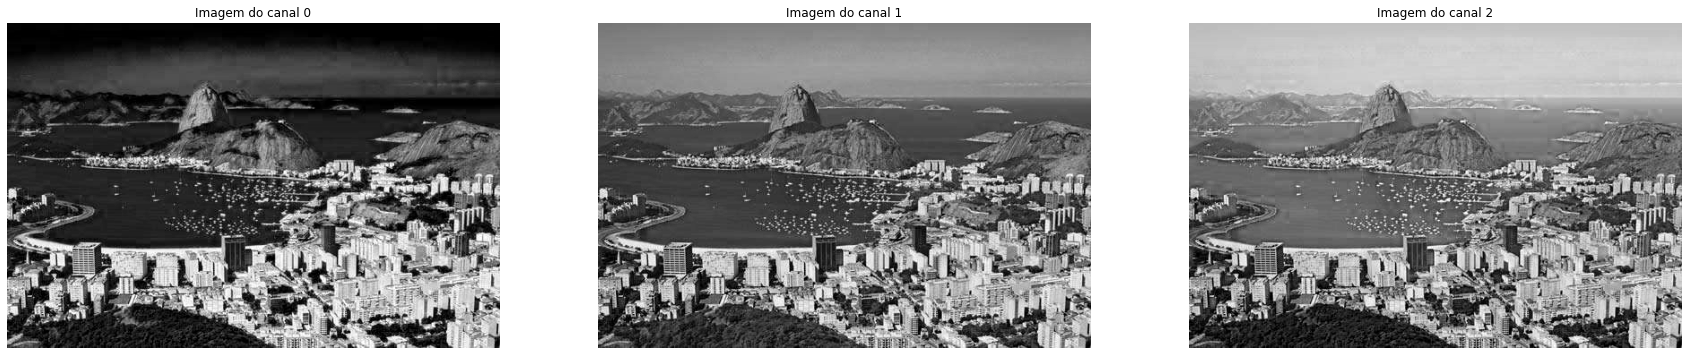

In [47]:
# Criando matrizes com cada canal da imagem (criando imagens monocromáticas)
img_ch0 = rio[:,:,0] # Matriz do vermelho R (primeiro canal)
img_ch1 = rio[:,:,1] # Matriz do verde G (segundo canal)
img_ch2 = rio[:,:,2] # Matriz do azul R (terceiro canal)

# Plotando as imagens de cada canal em escala de cinza
plt.figure(figsize=(30,10))
plt.subplot(1,3,1), plt.imshow(img_ch0, cmap = 'gray'), plt.title('Imagem do canal 0'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(img_ch1, cmap = 'gray'), plt.title('Imagem do canal 1'), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(img_ch2, cmap = 'gray'), plt.title('Imagem do canal 2'), plt.axis('off')
plt.show()

**(b)** Reconstrua a imagem das seguintes formas: 


*   Empilhando corretamente (RGB) os canais
*   Empilhando da forma BRG
*   Empilhando da forma GBR
*   Empilhando da forma RBG 

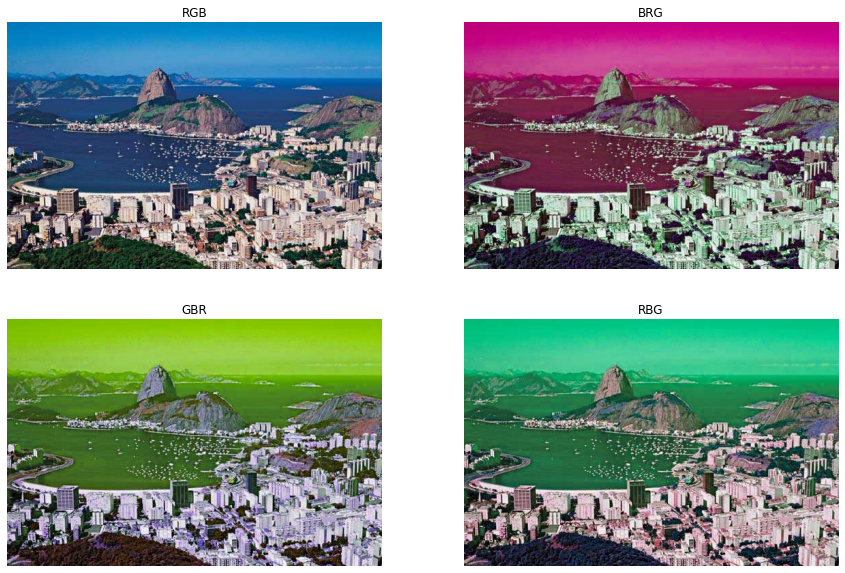

In [48]:
import numpy as np

# Reconstrução correta (RGB)
img_rec_RGB = np.stack((img_ch0, img_ch1, img_ch2), axis=-1)

# Reconstrução correta (BRG)
img_rec_BRG = np.stack((img_ch2, img_ch0, img_ch1), axis=-1)

# Reconstrução correta (GBR)
img_rec_GBR = np.stack((img_ch1, img_ch2, img_ch0), axis=-1)

# Reconstrução correta (RBG)
img_rec_RBG = np.stack((img_ch0, img_ch2, img_ch1), axis=-1)

# Exibindo as imagens geradas
plt.figure(figsize=(15,10))
plt.subplot(2,2,1), plt.imshow(img_rec_RGB), plt.title('RGB'), plt.axis('off')
plt.subplot(2,2,2), plt.imshow(img_rec_BRG), plt.title('BRG'), plt.axis('off')
plt.subplot(2,2,3), plt.imshow(img_rec_GBR), plt.title('GBR'), plt.axis('off')
plt.subplot(2,2,4), plt.imshow(img_rec_RBG), plt.title('RBG'), plt.axis('off')
plt.show()

**(c)** Fazer o negativo de cada canal, $g(x,y) = 255-f(x,y)$, e empilhar as imagens resultantes.

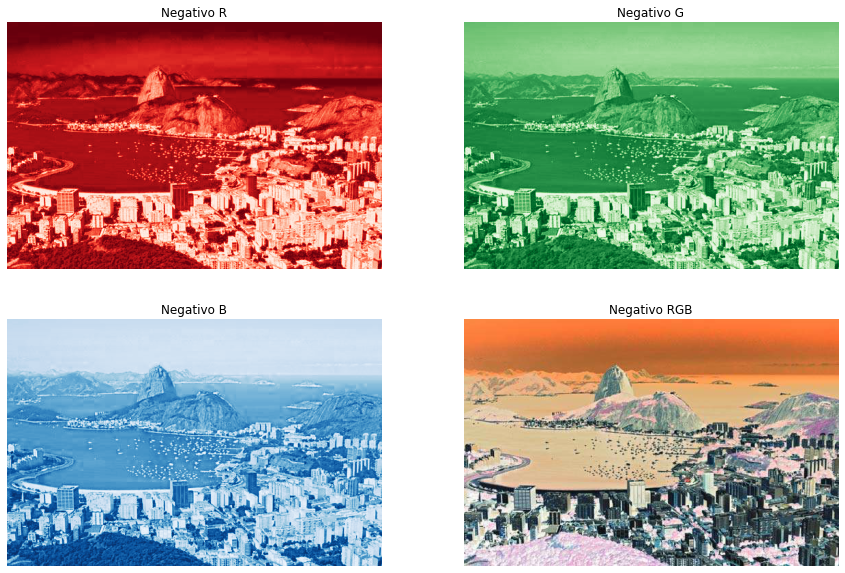

In [49]:
# Criando as imagens correspondentes ao negativo de cada canal
img_ch0_neg = 255-img_ch0
img_ch1_neg = 255-img_ch1
img_ch2_neg = 255-img_ch2

# Gerando a imagem a partir dos negativos
img_neg = np.stack((img_ch0_neg, img_ch1_neg, img_ch2_neg), axis=-1)

# Exibindo as imagens geradas
plt.figure(figsize=(15,10))
plt.subplot(2,2,1), plt.imshow(img_ch0_neg, cmap = 'Reds'), plt.title('Negativo R'), plt.axis('off')
plt.subplot(2,2,2), plt.imshow(img_ch1_neg, cmap = 'Greens'), plt.title('Negativo G'), plt.axis('off')
plt.subplot(2,2,3), plt.imshow(img_ch2_neg, cmap = 'Blues'), plt.title('Negativo B'), plt.axis('off')
plt.subplot(2,2,4), plt.imshow(img_neg), plt.title('Negativo RGB'), plt.axis('off')
plt.show()

## 5 - Histogramas

Histogramas são muito úteis para analisar os resultados dos tratamentos realizados nas imagens. Embora eles não tenham informação espacial, é possível quantificar o efeito de operações importantes como aumento de brilho e contraste da imagem.

**Exercício:**

**(a)** Transforme a matriz $N \times N$ correspondente a cada canal em um vetor com $N^2$ posições usando `np.flatten`.

In [50]:
# Transformando cada matriz em um vetor, com as linhas enfileiradas
img_ch0_flat = img_ch0.flatten()
img_ch1_flat = img_ch1.flatten()
img_ch2_flat = img_ch2.flatten()

# Exibindo as dimenões
print('Dimensões dos vetores obtidos pela aplicação do flatten():')
print('Canal 0: ', img_ch0_flat.shape)
print('Canal 1: ', img_ch1_flat.shape)
print('Canal 2: ', img_ch2_flat.shape)

Dimensões dos vetores obtidos pela aplicação do flatten():
Canal 0:  (199650,)
Canal 1:  (199650,)
Canal 2:  (199650,)


**(b)** Desenhe os histogramas de cada canal da imagem

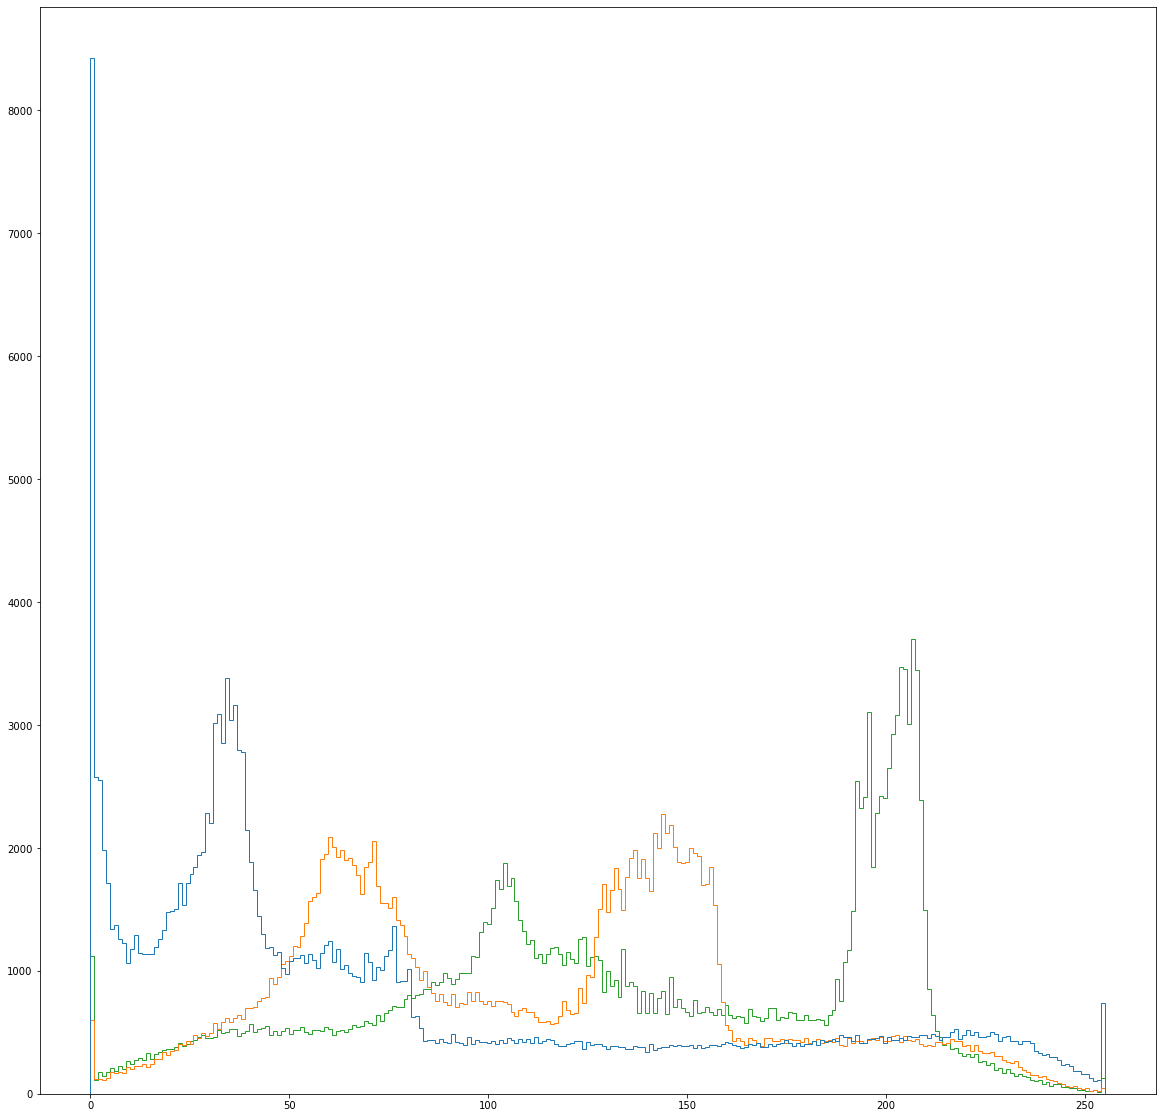

In [51]:
# Exibindo o histrograma de cada um dos canais em subplots
plt.figure(figsize=(20,20))

# plt.subplot(3,1,1), plt.hist(img_ch0_flat, bins=256), plt.title('Canal Vermelho')
# plt.subplot(3,1,2), plt.hist(img_ch1_flat, bins=256), plt.title('Canal Verde')
# plt.subplot(3,1,3), plt.hist(img_ch2_flat, bins=256), plt.title('Canal Azul')

plt.hist([img_ch0_flat, img_ch1_flat, img_ch2_flat], histtype='step', bins=256)

plt.show()

**(c)** Calcule média, desvio padrão e os seguintes percentis de cada canal: P25 (25% maiores) e P75 (75% maiores).

In [52]:
# Calculando e exibindo a média
media_ch0 = np.mean(img_ch0)
media_ch1 = np.mean(img_ch1)
media_ch2 = np.mean(img_ch2)
print(media_ch0)
print(media_ch1)
print(media_ch2)

81.30320060105184
112.03757575757575
136.03285249186075


In [53]:
# Calculando o valor de desvio padrão

# Quanto maior for o desvio padrão, maior vai ser o contraste
std_ch0 = np.std(img_ch0)
print(std_ch0)
std_ch1 = np.std(img_ch1)
print(std_ch1)
std_ch2 = np.std(img_ch2)
print(std_ch2)

72.01779568510082
54.68755109677171
60.12562962200941


In [54]:
# Calculando os percentis
# Útil para fazer alargamento de contraste

perc_ch0 = np.percentile(img_ch0, 10)
print(perc_ch0)
# 10% dos pixels dessa imagem estão abaixo da intensidade 7

perc_ch1 = np.percentile(img_ch1, 10)
print(perc_ch1)
# 10% dos pixels dessa imagem estão abaixo da intensidade 46

perc_ch2 = np.percentile(img_ch2, 10)
print(perc_ch2)
# 10% dos pixels dessa imagem estão abaixo da intensidade 49

7.0
46.0
49.0


## 6 - Brilho e Contraste

**Exercício:**

**(a)** Variar o brilho da imagem, multiplicando todos os pixels da imagem de 0.5 a 2.0

1.0


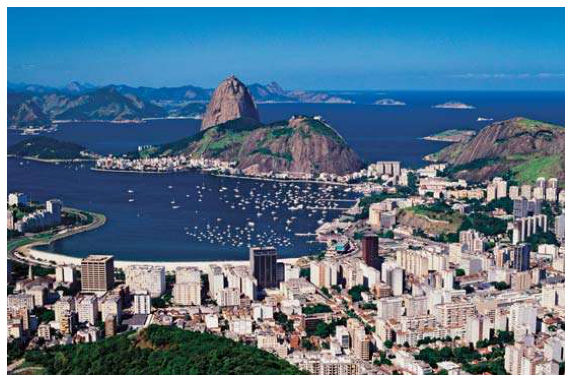

In [55]:
# Normalizando a imagem
img_norm = rio/255
print(np.amax(img_norm))

plt.figure(figsize=(10,10))
plt.imshow(img_norm)
plt.axis('off')
plt.show()

**(b)** Use a função `skimage.exposure.rescale_intensity` para re-escalar as intensidades da imagem em escala de cinza, usando como limites as intensidades correspondentes aos percentis P2 e P98.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


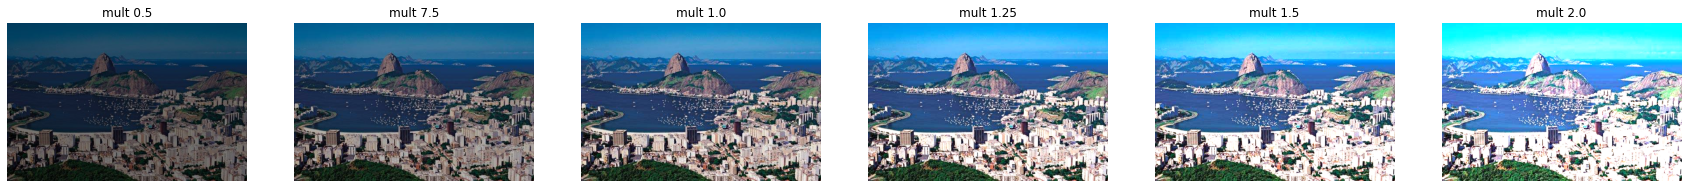

In [56]:
# Gerando as imagens com variação de brilho
img_brl_0p5 = img_norm * 0.5
img_brl_0p75 =  img_norm * 0.75
img_brl_1p0 = img_norm * 1.0
img_brl_1p25 = img_norm * 1.25
img_brl_1p5 = img_norm * 1.5
img_brl_2p0 = img_norm * 2.0

# Exibindo as imagens com variação de brilho
plt.figure(figsize = (30,10))
plt.subplot(1,6,1), plt.imshow(img_brl_0p5), plt.title('mult 0.5'), plt.axis('off')
plt.subplot(1,6,2), plt.imshow(img_brl_0p75), plt.title('mult 7.5'), plt.axis('off')
plt.subplot(1,6,3), plt.imshow(img_brl_1p0), plt.title('mult 1.0'), plt.axis('off')
plt.subplot(1,6,4), plt.imshow(img_brl_1p25), plt.title('mult 1.25'), plt.axis('off')
plt.subplot(1,6,5), plt.imshow(img_brl_1p5), plt.title('mult 1.5'), plt.axis('off')
plt.subplot(1,6,6), plt.imshow(img_brl_2p0), plt.title('mult 2.0'), plt.axis('off')
plt.show()

**(c)** Fazer o mesmo processo do item (b) para as imagens `moon` e `camera` da base de dados do Scikit-Image. Qual delas tem maior ganho de contraste com a operação?

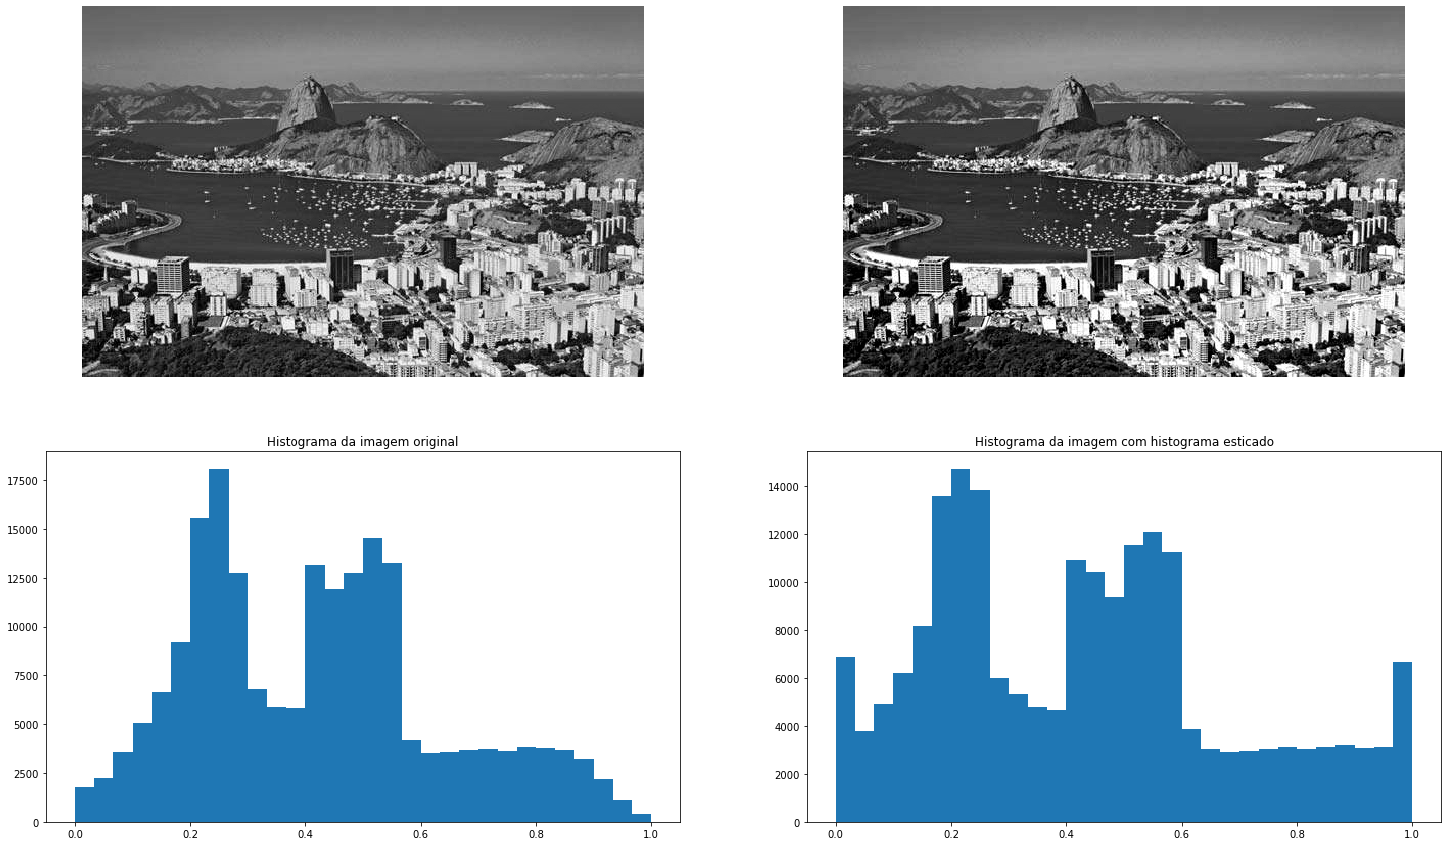

In [57]:
from skimage import exposure

# Calculando os percentis limitantes inferior e superior
pinf = np.percentile(rio_gray, 2)
psup = np.percentile(rio_gray, 98)

# Re-escalando a intensidade da imagem, considerando os limites calculados
rio_gray_rescale = exposure.rescale_intensity(rio_gray, in_range=(pinf, psup))

# Exibindo a imagem gerada
plt.figure(figsize = (25,15))
plt.subplot(2,2,1), plt.imshow(rio_gray, cmap='gray', interpolation='nearest'), plt.axis('off')
plt.subplot(2,2,2), plt.imshow(rio_gray_rescale, cmap='gray', interpolation='nearest'), plt.axis('off')
plt.subplot(2,2,3), plt.hist(rio_gray.flatten(), bins = 30), plt.title('Histograma da imagem original')
plt.subplot(2,2,4), plt.hist(rio_gray_rescale.flatten(), bins = 30), plt.title('Histograma da imagem com histograma esticado')
plt.show()

**(d)** Use a função `skimage.exposure.equalize_hist` para equalizar os histogramas das imagem `moon` e `camera` da base de dados do Scikit-Image. Qual delas tem maior ganho de contraste com a operação?

(512, 512)


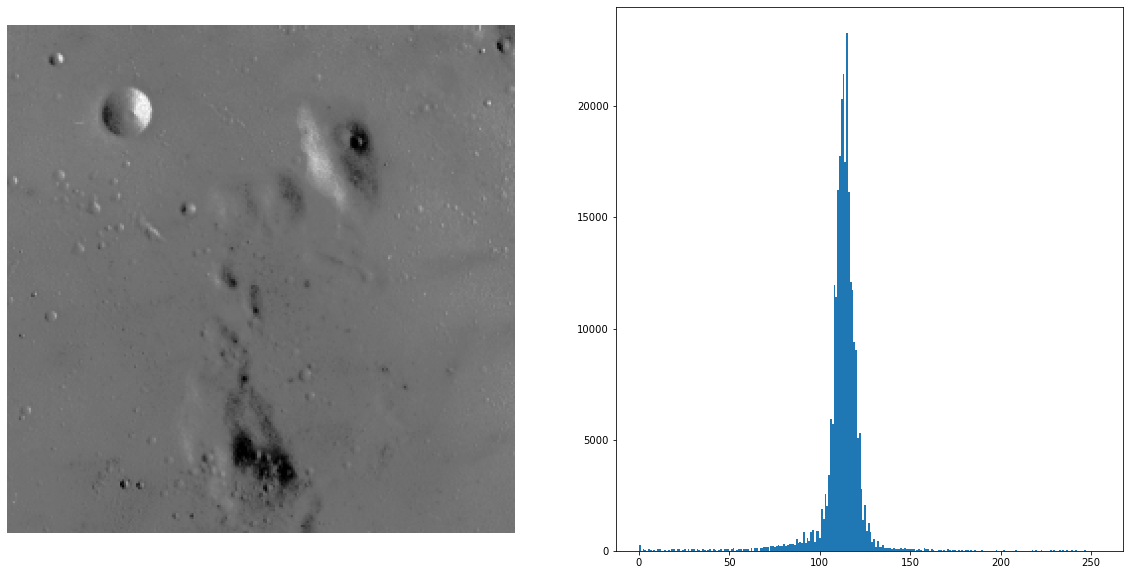

In [58]:
imgdata = data.moon()
print(imgdata.shape)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1), plt.imshow(imgdata, cmap='gray'), plt.axis('off')
plt.subplot(1,2,2), plt.hist(imgdata.flatten(), bins=256)
plt.show()

**(e)** Use a função `skimage.exposure.match_histogram` para fazer o pareamento de histograma das imagens `coffe` e `chelsea` da base de dados do Scikit-Image.

78.0 129.0


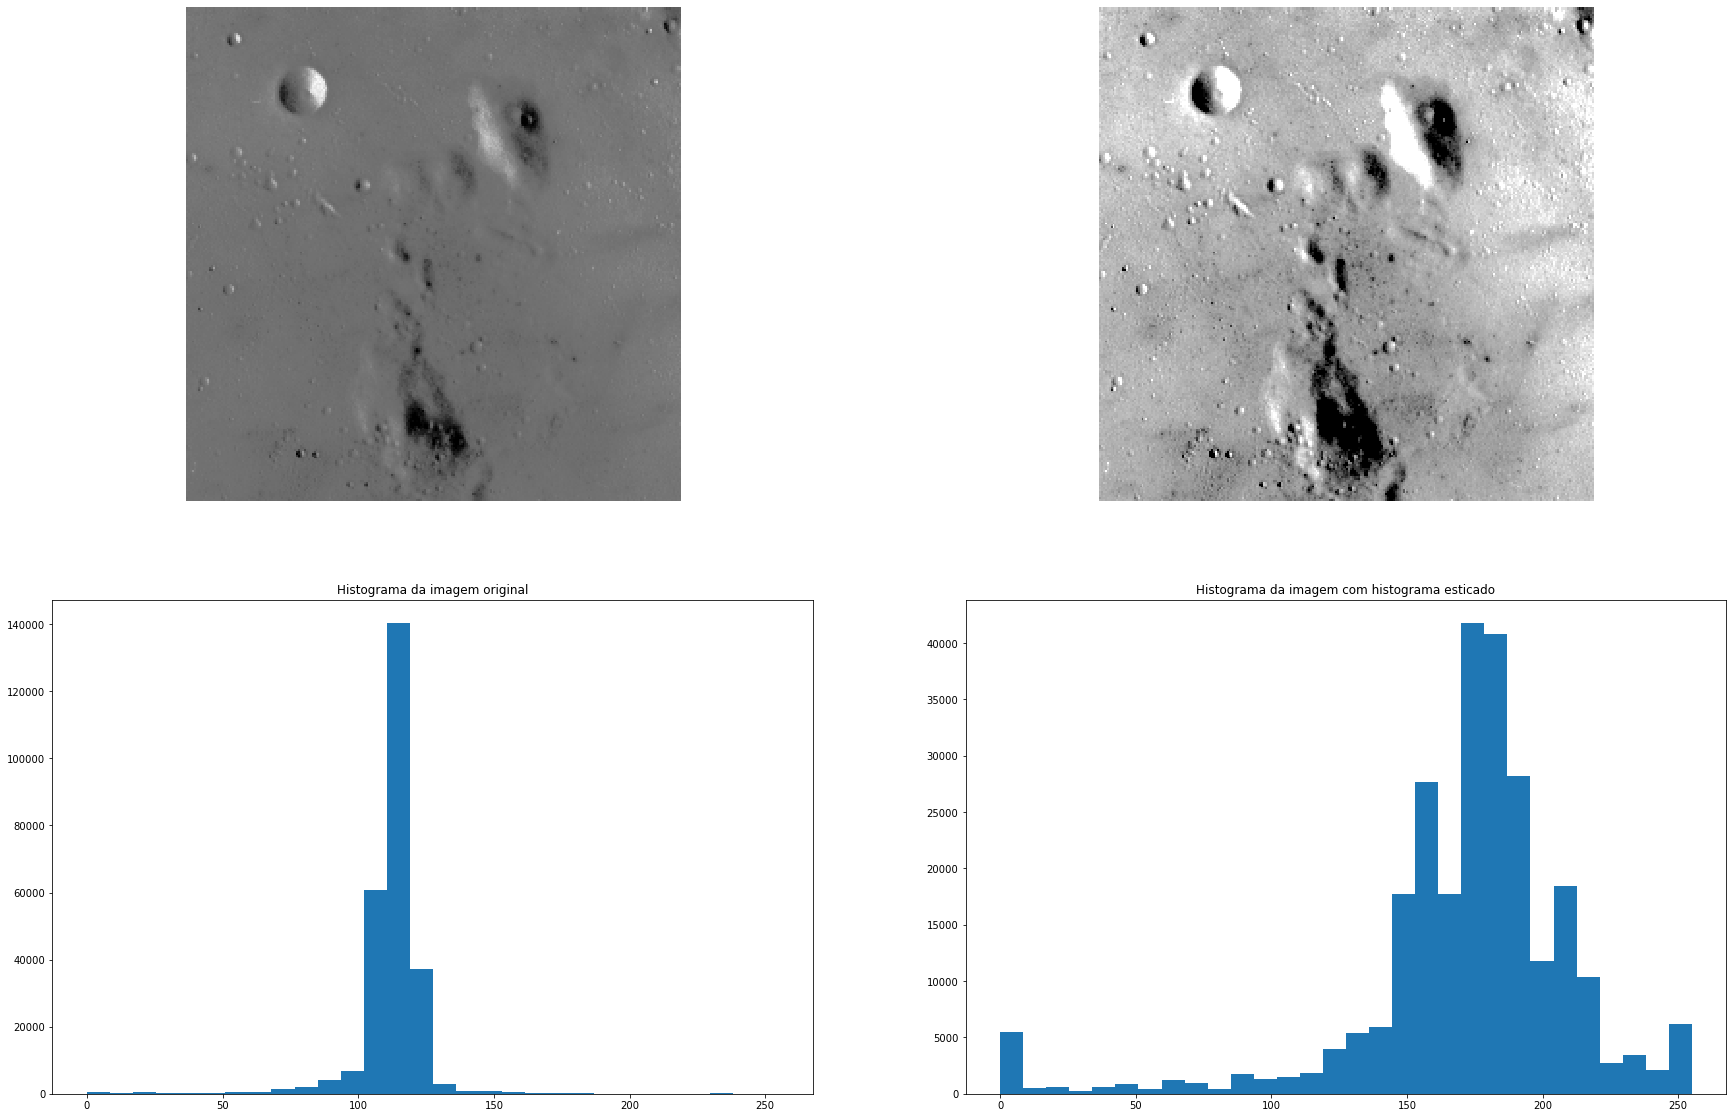

In [59]:
imgdata = data.moon()  # Usar data.moon() e data.camera()

# Fazer o mesmo procedimento anterior para a imgdata
pinf = np.percentile(imgdata, 2)
psup = np.percentile(imgdata, 98)
print(pinf, psup)

imgdata_rescale = exposure.rescale_intensity(imgdata, in_range=(pinf, psup))

plt.figure(figsize = (30,20))
plt.subplot(2,2,1), plt.imshow(imgdata, cmap='gray', interpolation='nearest'), plt.axis('off')
plt.subplot(2,2,2), plt.imshow(imgdata_rescale, cmap='gray', interpolation='nearest'), plt.axis('off')
plt.subplot(2,2,3), plt.hist(imgdata.flatten(), bins = 30), plt.title('Histograma da imagem original')
plt.subplot(2,2,4), plt.hist(imgdata_rescale.flatten(), bins = 30), plt.title('Histograma da imagem com histograma esticado')
plt.show()